¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Introducción:

Este proyecto se lleva a cabo para una empresa emergente que vende productos alimenticios a través de una aplicación móvil. El objetivo principal es estudiar cómo interactúan los usuarios con la aplicación y analizar su progreso a través del embudo de ventas, identificando cuántos llegan a la etapa de compra y en qué puntos se detienen durante su recorrido.
Adicionalmente, se busca evaluar los resultados de un test A/A/B diseñado para analizar el impacto de un cambio en el diseño de las fuentes de la aplicación.
A través del análisis de los datos de eventos de usuario, este proyecto busca proporcionar insights clave para la toma de decisiones estratégicas, optimizando tanto la experiencia del usuario como los resultados del negocio.

## Paso 1. Abrir el archivo de datos y leer la información general

In [46]:
import pandas as pd
datos = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

datos


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, usaste una celda independiente para importar las librerías y leer los datos. Aunque te recomendaría que incluso lo hagas separado, en una las librerías y en otra los datos.
</div>


## Paso 2. Preparar los datos para el análisis
•	Cambia el nombre de las columnas de manera que sea conveniente para ti.(que estén más estructurados y parecidos a lo que se refieren )
•	Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.
•	Agrega una columna de fecha y hora y una columna separada para las fechas.


### •	Cambia el nombre de las columnas de manera que sea conveniente para ti.

In [47]:
# Cambiar nombres de columnas para que sean más claros y estructurados
datos.rename(
    columns={
        'EventName': 'event_name',
        'DeviceIDHash': 'device_id_hash',
        'EventTimestamp': 'event_timestamp',
        'ExpId': 'experiment_id'
    }, 
    inplace=True
)

# Verificar los nuevos nombres
print(datos.columns)

Index(['event_name', 'device_id_hash', 'event_timestamp', 'experiment_id'], dtype='object')


### •Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.

In [48]:
# Información del DataFrame
print(datos.info())

# Verificar valores ausentes
print(datos.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   experiment_id    244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None
event_name         0
device_id_hash     0
event_timestamp    0
experiment_id      0
dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>


### •Convertir tipos de datos (si es necesario)

In [49]:
# Convertir 'event_timestamp' a tipo datetime
datos['event_timestamp'] = pd.to_datetime(datos['event_timestamp'], unit='s')

print(datos.dtypes)

event_name                 object
device_id_hash              int64
event_timestamp    datetime64[ns]
experiment_id               int64
dtype: object


### Agregar columnas para fecha y hora separadas

In [50]:
    # Crear columna para la fecha
datos['date'] = datos['event_timestamp'].dt.date

# Crear columna para la hora
datos['time'] = datos['event_timestamp'].dt.time

# Verificar las nuevas columnas
print(datos[['event_timestamp', 'date', 'time']].head())

      event_timestamp        date      time
0 2019-07-25 04:43:36  2019-07-25  04:43:36
1 2019-07-25 11:11:42  2019-07-25  11:11:42
2 2019-07-25 11:28:47  2019-07-25  11:28:47
3 2019-07-25 11:28:47  2019-07-25  11:28:47
4 2019-07-25 11:48:42  2019-07-25  11:48:42


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se manejaron correctamente los tipos de datos.
</div>


## Estudiar y comprobar los datos

### ¿Cuántos eventos hay en los registros? 

In [51]:
num_eventos = len(datos)
print(f"Total de eventos: {num_eventos}")

Total de eventos: 244126


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

La respuesta es correcta.
</div>


### ¿Cuántos usuarios hay en los registros?

In [52]:
num_usuarios = datos['device_id_hash'].nunique()
print(f"Total de usuarios: {num_usuarios}")

Total de usuarios: 7551


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien.
</div>


### ¿Cuál es el promedio de eventos por usuario?

In [53]:
# Promedio de eventos por usuario
promedio_eventos_usuario = num_eventos / num_usuarios
print(f"Promedio de eventos por usuario: {promedio_eventos_usuario:.2f}")

Promedio de eventos por usuario: 32.33


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, obtuviste correctamente los eventos promedio.
</div>


### ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima.

In [54]:
# Encontrar la fecha mínima y máxima
fecha_minima = datos['event_timestamp'].min()
fecha_maxima = datos['event_timestamp'].max()

print(f"Fecha mínima: {fecha_minima}")
print(f"Fecha máxima: {fecha_maxima}")




Fecha mínima: 2019-07-25 04:43:36
Fecha máxima: 2019-08-07 21:15:17


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos min y max.
</div>


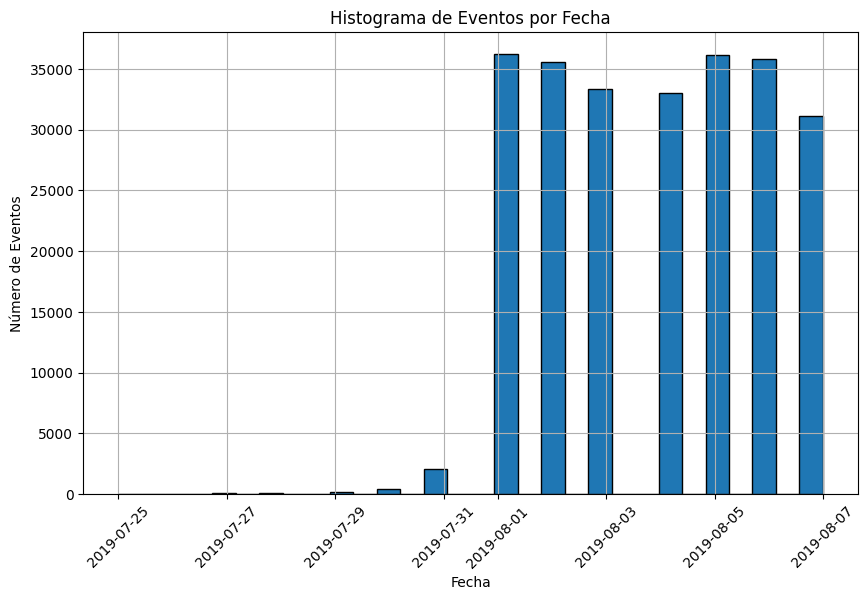

In [55]:
# Traza un histograma de eventos por fecha (diario) y hora
import matplotlib.pyplot as plt

# Extraer solo la fecha para el histograma de fechas
datos['date_only'] = datos['event_timestamp'].dt.date

# Graficar histograma de eventos por fecha
plt.figure(figsize=(10, 6))
datos['date_only'].hist(bins=30, edgecolor='black')
plt.title('Histograma de Eventos por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. El histograma muestra correctamente la distribución.
</div>


En el histograma por fechas.
Los datos comienzan a reflejarse apartir del 25 de julio de 2019 al  7 de agosto de 2019. 
No todos los datos son iguales en todo el periodo,  antes del 01 de agosto del 2019 no existen datos suficientes.
Los datos confiables son del rango 01 de agosto del 2019 al 07 de agosto del 2019.

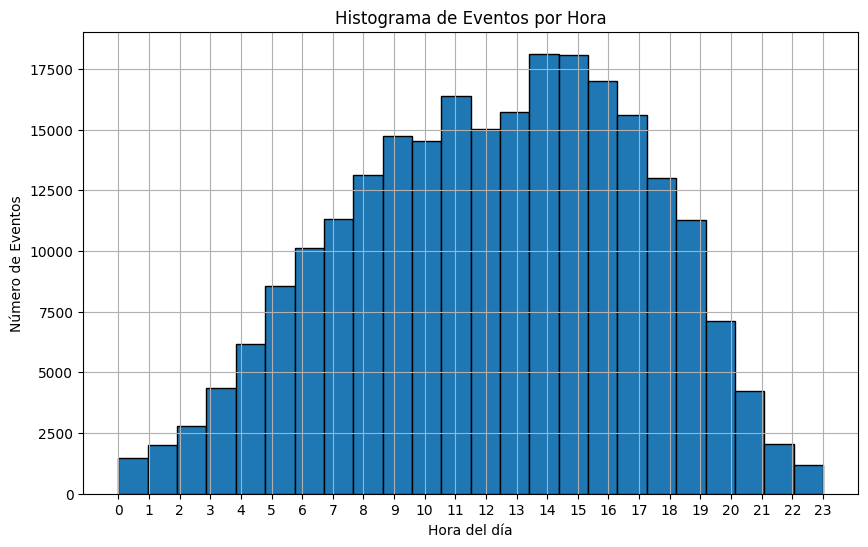

In [56]:
# Graficar histograma de eventos por hora
datos['hour_only'] = datos['event_timestamp'].dt.hour

plt.figure(figsize=(10, 6))
datos['hour_only'].hist(bins=24, edgecolor='black')
plt.title('Histograma de Eventos por Hora')
plt.xlabel('Hora del día')
plt.ylabel('Número de Eventos')
plt.xticks(range(24))
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente! Este histograma es correcto, se muestra adecuadamente la distribución de los eventos a lo largo del día.
</div>


El histograma por hora indica que los usuarios están más activos de 11 a 17 hrs.

In [57]:
# Mostrar los primeros eventos (si hay una caída en las fechas iniciales)
print(datos.head())

# Filtrar y mostrar los eventos de los primeros días
primeros_eventos = datos[datos['date_only'] < fecha_minima]
print(f"Eventos antes de {fecha_minima}:")
print(primeros_eventos)

                event_name       device_id_hash     event_timestamp  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   

   experiment_id        date      time   date_only  hour_only  
0            246  2019-07-25  04:43:36  2019-07-25          4  
1            246  2019-07-25  11:11:42  2019-07-25         11  
2            248  2019-07-25  11:28:47  2019-07-25         11  
3            248  2019-07-25  11:28:47  2019-07-25         11  
4            248  2019-07-25  11:48:42  2019-07-25         11  
Eventos antes de 2019-07-25 04:43:36:
Empty DataFrame
Columns: [event_name, device_id_hash, event_timestamp, experiment_id, date, time, date_only, hour_only]
Index: []


### Distribución de eventos for fecha limpiando los datos

Registros después de la limpieza: 244126
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
Name: date_only, dtype: int64
Registros después de la limpieza: 241298
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
Name: date_only, dtype: int64


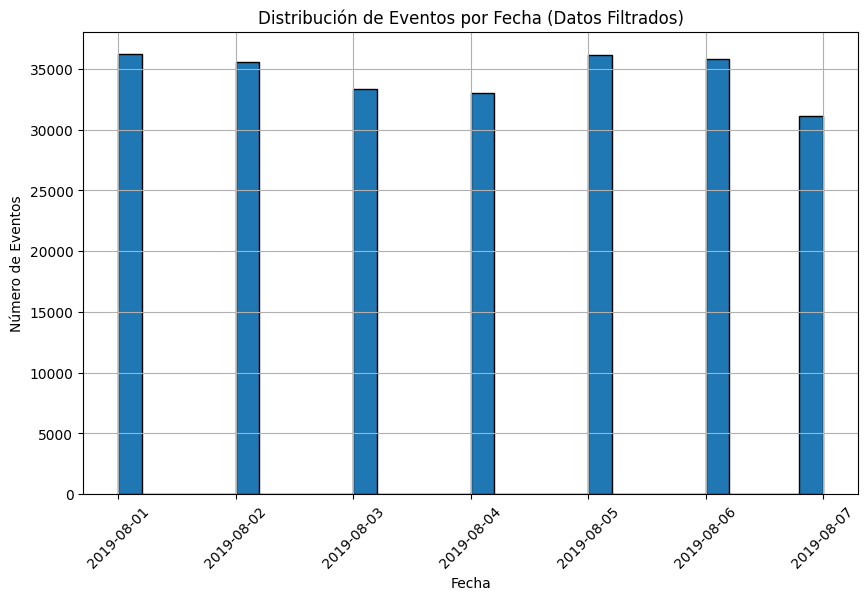

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que 'date_only' esté en formato datetime
datos['date_only'] = pd.to_datetime(datos['date_only'])


# Verificar los datos antes de la limpieza
print(f"Registros después de la limpieza: {len(datos)}")
print(datos['date_only'].value_counts().sort_index())


# Filtrar eliminando los datos con fecha menor al 1 de agosto de 2019
datos = datos[datos['date_only'] >= '2019-08-01']

# Verificar los datos después de la limpieza
print(f"Registros después de la limpieza: {len(datos)}")
print(datos['date_only'].value_counts().sort_index())

# Graficar nuevamente el histograma para las fechas filtradas
plt.figure(figsize=(10, 6))
datos['date_only'].hist(bins=30, edgecolor='black')
plt.title('Distribución de Eventos por Fecha (Datos Filtrados)')
plt.xlabel('Fecha')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, la tabla se filtró correctamente.
</div>


Los datos actuales ya se ven más uniformes, eliminando los primeros registros anteriores al 01 de agosto del 2018, que eran un número de eventos menor, probablemente porque se iba iniciando el registro de usuarios.

### Asegúrate de tener usuarios de los tres grupos experimentales.

In [59]:
# Verificar cuántos grupos experimentales diferentes hay
grupos_experimentales = datos['experiment_id'].nunique()
print(f"Total de grupos experimentales: {grupos_experimentales}")

# Verificar los grupos experimentales específicos
grupos_detalle = datos['experiment_id'].value_counts()
print("Distribución de usuarios por grupo experimental:")
print(grupos_detalle)


Total de grupos experimentales: 3
Distribución de usuarios por grupo experimental:
248    84726
246    79425
247    77147
Name: experiment_id, dtype: int64


In [60]:
print(datos.columns)
print (datos.info())
print(" ")
print(" ")
print(" ")
print(" ")


Index(['event_name', 'device_id_hash', 'event_timestamp', 'experiment_id',
       'date', 'time', 'date_only', 'hour_only'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 241298 entries, 2828 to 244125
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       241298 non-null  object        
 1   device_id_hash   241298 non-null  int64         
 2   event_timestamp  241298 non-null  datetime64[ns]
 3   experiment_id    241298 non-null  int64         
 4   date             241298 non-null  object        
 5   time             241298 non-null  object        
 6   date_only        241298 non-null  datetime64[ns]
 7   hour_only        241298 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 16.6+ MB
None
 
 
 
 


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, tienes información de los tres grupos.
</div>


## Paso 4. Estudiar el embudo de eventos

### Verificar sus eventos y su frecuencia

In [61]:
# Contar la frecuencia de cada evento
event_counts = datos['event_name'].value_counts()

# Ordenar por frecuencia
event_counts_sorted = event_counts.sort_values(ascending=False)

# Mostrar resultados
print(event_counts_sorted)
print(" ")
print(" ")

# Eliminar las filas donde el evento sea 'Tutorial'
datos = datos[datos['event_name'] != 'Tutorial']

# Verificar que se haya eliminado correctamente
print("Eventos únicos después de eliminar 'Tutorial':")
print(datos['event_name'].unique())


MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: event_name, dtype: int64
 
 
Eventos únicos después de eliminar 'Tutorial':
['MainScreenAppear' 'OffersScreenAppear' 'CartScreenAppear'
 'PaymentScreenSuccessful']


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

El embudo de eventos se obtuvo correctamente.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Como consejo, se pueden realizar gráficas de embudos, busca funnel graph python y te apareceran varios ejemplos, por ejemplo en este link vienen algunos ejemplos muy bonitos: https://coderzcolumn.com/tutorials/data-science/sales-funnel-chart-using-matplotlib 
</div>


El embudo empieza con el evento MainScreenAppear y termina con PaymentScreenSuccessful. El Tutorial podemos pensar que no todas las personas lo realizan por eso es el que tiene menos usuarios que lo usan. El dato del tutorial lo eliminamos.

### Usuarios únicos por evento y su proporción

In [62]:
        # Contar usuarios únicos por evento
        users_per_event = datos.groupby('event_name')['device_id_hash'].nunique()

        # Calcular proporción de usuarios
        total_users = datos['device_id_hash'].nunique()
        proportion_per_event = (users_per_event / total_users).sort_values(ascending=False)

        # Crear un DataFrame con resultados
        result = pd.DataFrame({
            'users_per_event': users_per_event,
            'proportion': proportion_per_event
        })

        # Mostrar resultados
        print("Cantidad y proporción de usuarios por evento:")
        print(result)

Cantidad y proporción de usuarios por evento:
                         users_per_event  proportion
event_name                                          
CartScreenAppear                    3734    0.495883
MainScreenAppear                    7419    0.985259
OffersScreenAppear                  4593    0.609960
PaymentScreenSuccessful             3539    0.469987


### Secuencia y orden de los eventos

In [63]:
# Identificar el primer evento realizado por cada usuario
first_events = datos.sort_values(by=['device_id_hash', 'event_timestamp']).groupby('device_id_hash').first()

# Mostrar los eventos iniciales para cada usuario
print("Primer evento realizado por los usuarios:")
print(first_events['event_name'].value_counts())


Primer evento realizado por los usuarios:
MainScreenAppear           7084
OffersScreenAppear          288
PaymentScreenSuccessful      96
CartScreenAppear             62
Name: event_name, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, los cálculos son correctos.
</div>

### Cálculo de embudo de eventos

In [68]:
# Contar usuarios únicos por evento
users_per_event = datos.groupby('event_name')['device_id_hash'].nunique()

# Ordenar eventos por frecuencia (puedes optar por ordenar o no dependiendo de tu necesidad)
events_order = users_per_event.sort_values(ascending=False).index

# Crear una lista para almacenar el número de usuarios únicos en cada etapa del embudo
funnel_data = []

# Calcular el número de usuarios únicos por cada evento del embudo
for event in events_order:
    users_in_event = users_per_event[event]
    funnel_data.append(users_in_event)

# Calcular proporciones entre etapas con manejo de divisiones por cero
funnel_ratios = [
    funnel_data[i] / funnel_data[i-1] if funnel_data[i-1] > 0 else None
    for i in range(1, len(funnel_data))
]

# Calcular el porcentaje de pérdida entre etapas
loss_percentages = [
    (1 - funnel_data[i] / funnel_data[i-1]) * 100 if funnel_data[i-1] > 0 else None
    for i in range(1, len(funnel_data))
]

# Crear DataFrame con el embudo
funnel_df = pd.DataFrame({
    'event': events_order,
    'users': funnel_data,
    'proportion_to_previous': [None] + funnel_ratios,  # El primer evento no tiene proporción previa
    'loss_percentage': [None] + loss_percentages  # El primer evento no tiene pérdida previa
})

# Mostrar resultados
print(funnel_df)

                     event  users  proportion_to_previous  loss_percentage
0         MainScreenAppear   7419                     NaN              NaN
1       OffersScreenAppear   4593                0.619086        38.091387
2         CartScreenAppear   3734                0.812976        18.702373
3  PaymentScreenSuccessful   3539                0.947777         5.222282


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Los conteos se ven bien.
</div>

### Identificar pérdidas de usuarios

La mayor perdida de usuarios está entre la etapa de MainsScreenAppear y la etapa de OffersScreenAppear. De 7,419 Usuarios que pasan a la siguiente estapa que son 4593, representan el 61.9 % y la diferencia es la que se pierde. El 38% de los usuarios se pierden

### Porcentaje de usuarios que completan todo el proceso

In [70]:
# Calcular el porcentaje de usuarios que completan todo el proceso (del primer evento al último)
total_users_first_event = funnel_data[0]  # Usuarios del primer evento
total_users_last_event = funnel_data[-1]  # Usuarios del último evento

completion_percentage = (total_users_last_event / total_users_first_event) * 100

# Mostrar resultados del embudo y el porcentaje de usuarios que completan todo el proceso
print(funnel_df)
print(f"Porcentaje de usuarios que completan todo el embudo: {completion_percentage:.2f}%")

                     event  users  proportion_to_previous  loss_percentage
0         MainScreenAppear   7419                     NaN              NaN
1       OffersScreenAppear   4593                0.619086        38.091387
2         CartScreenAppear   3734                0.812976        18.702373
3  PaymentScreenSuccessful   3539                0.947777         5.222282
Porcentaje de usuarios que completan todo el embudo: 47.70%


## Paso 5. Estudiar los resultados del experimento

### Prueba A/A entre los grupos de control (246 y 247)

In [76]:
from scipy.stats import ttest_ind

# Número de usuarios únicos por grupo
user_count_per_group = datos.groupby('experiment_id')['device_id_hash'].nunique()
print(user_count_per_group)

# Filtrar los datos para los grupos de control
group_246 = datos[datos['experiment_id'] == 246]
group_247 = datos[datos['experiment_id'] == 247]

# Asegúrate de definir la métrica que estás comparando, por ejemplo, número de eventos por usuario.
events_per_user_246 = group_246.groupby('device_id_hash')['event_name'].count()
events_per_user_247 = group_247.groupby('device_id_hash')['event_name'].count()



# Test t de Student para muestras independientes
t_stat, p_value = ttest_ind(events_per_user_246, events_per_user_247, equal_var=False)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")


experiment_id
246    2483
247    2512
248    2535
Name: device_id_hash, dtype: int64
Estadístico t: 0.7441585515973078
Valor p: 0.45681642752792995


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! La prueba de hipótesis se realizó correctamente y el p valor se interpretó correctamente.
</div>

Los dos grupos de control (246 y 247) son estadísticamente equivalentes en términos de la métrica analizada (número de eventos por usuario). Esto es un buen resultado para un test A/A, ya que confirma que los grupos de control están bien equilibrados y que las diferencias observadas son atribuibles al azar, no a un problema en los mecanismos del experimento.

In [77]:
from scipy.stats import levene

# Prueba de Levene para igualdad de varianzas
stat_levene, p_levene = levene(events_per_user_246, events_per_user_247)
print(f"Prueba de Levene: estadístico={stat_levene}, p={p_levene}")

# Interpretación
if p_levene > 0.05:
    print("No hay evidencia de que las varianzas sean diferentes (asumimos varianzas iguales).")
else:
    print("Las varianzas parecen ser diferentes (usar equal_var=False en la prueba t).")

Prueba de Levene: estadístico=0.5746453124624482, p=0.44845465182121824
No hay evidencia de que las varianzas sean diferentes (asumimos varianzas iguales).


La prueba t clásica asume que las varianzas de las dos muestras son iguales. Para verificar esto:
Prueba de Levene: Es una de las más comunes para comparar varianzas entre grupos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso del if para imprimir correctamente el resultado de la interpretación del p valor.
</div>

### Identificar el evento más popular

In [79]:
# Contamos la cantidad de veces que se repite cada evento
event_counts = datos['event_name'].value_counts()

# El evento más popular
most_popular_event = event_counts.idxmax()
print(f"El evento más popular es: {most_popular_event}")

El evento más popular es: MainScreenAppear


### Encontrar la cantidad de usuarios que realizaron este evento

In [83]:
# Filtramos los datos de los grupos 246 y 247 para el evento más popular
group_246_event = group_246[group_246['event_name'] == most_popular_event]
group_247_event = group_247[group_247['event_name'] == most_popular_event]

# Contamos la cantidad de usuarios únicos que realizaron el evento en cada grupo
users_246_event = group_246_event['device_id_hash'].nunique()
users_247_event = group_247_event['device_id_hash'].nunique()

# Número total de usuarios en cada grupo
total_users_246 = user_count_per_group[246]
total_users_247 = user_count_per_group[247]

# Proporción de usuarios que realizaron el evento
prop_246 = users_246_event / total_users_246
prop_247 = users_247_event / total_users_247

print(f"Proporción de usuarios que realizaron el evento en el grupo 246: {prop_246}")
print(f"Proporción de usuarios que realizaron el evento en el grupo 247: {prop_247}")

Proporción de usuarios que realizaron el evento en el grupo 246: 0.9867096254530809
Proporción de usuarios que realizaron el evento en el grupo 247: 0.9856687898089171


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, estas proporciones son correctas.
</div>

### Comprobar si la diferencia es estadísticamente significativa.

In [84]:
from scipy.stats import chi2_contingency

# Creamos la tabla de contingencia (usuarios que realizaron el evento y no lo realizaron)
contingency_table = [
    [users_246_event, total_users_246 - users_246_event],  # Grupo 246
    [users_247_event, total_users_247 - users_247_event]   # Grupo 247
]

# Realizamos la prueba de Chi-cuadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Estadístico Chi-cuadrado: {chi2_stat}")
print(f"Valor p: {p_value}")

Estadístico Chi-cuadrado: 0.037594169110996584
Valor p: 0.8462603238318962


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien.
</div>

### Automatizar para todos los eventos

In [85]:
def analyze_event(event_name):
    # Filtramos los datos para el evento
    group_246_event = group_246[group_246['event_name'] == event_name]
    group_247_event = group_247[group_247['event_name'] == event_name]

    # Contamos los usuarios únicos que realizaron el evento
    users_246_event = group_246_event['device_id_hash'].nunique()
    users_247_event = group_247_event['device_id_hash'].nunique()

    # Proporción de usuarios que realizaron el evento
    prop_246 = users_246_event / total_users_246
    prop_247 = users_247_event / total_users_247

    # Imprimimos la proporción de usuarios que realizaron el evento
    print(f"Evento: {event_name}")
    print(f"Proporción en grupo 246: {prop_246}")
    print(f"Proporción en grupo 247: {prop_247}")

    # Tabla de contingencia
    contingency_table = [
        [users_246_event, total_users_246 - users_246_event],  # Grupo 246
        [users_247_event, total_users_247 - users_247_event]   # Grupo 247
    ]

    # Prueba de Chi-cuadrado
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    print(f"Estadístico Chi-cuadrado: {chi2_stat}")
    print(f"Valor p: {p_value}")
    print("-" * 50)

# Aplicamos la función a todos los eventos
for event in event_counts.index:
    analyze_event(event)


Evento: MainScreenAppear
Proporción en grupo 246: 0.9867096254530809
Proporción en grupo 247: 0.9856687898089171
Estadístico Chi-cuadrado: 0.037594169110996584
Valor p: 0.8462603238318962
--------------------------------------------------
Evento: OffersScreenAppear
Proporción en grupo 246: 0.6210229561014902
Proporción en grupo 247: 0.6050955414012739
Estadístico Chi-cuadrado: 1.2690243567546489
Valor p: 0.2599497897146019
--------------------------------------------------
Evento: CartScreenAppear
Proporción en grupo 246: 0.5098670962545309
Proporción en grupo 247: 0.4928343949044586
Estadístico Chi-cuadrado: 1.3817445476858676
Valor p: 0.23980421081879894
--------------------------------------------------
Evento: PaymentScreenSuccessful
Proporción en grupo 246: 0.4832863471606927
Proporción en grupo 247: 0.4609872611464968
Estadístico Chi-cuadrado: 2.402777069887885
Valor p: 0.12112006592750903
--------------------------------------------------


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, la automatización se realizó correctamente con los demás grupos, bue uso del ciclo for.
</div>

Dado que en todos los eventos el valor p es mayor que 0.05, no hay evidencia suficiente para rechazar la hipótesis nula, lo que significa que no hay diferencias significativas entre los dos grupos de control. Esto sugiere que los grupos de control están balanceados correctamente y que cualquier diferencia observada en estos eventos podría ser atribuida al azar y no a un sesgo en la asignación de los grupos.

## Filtrar los datos para el grupo 248 y comparar contra los dos grupos de control 246 y 247

In [86]:
# Filtrar los datos para el grupo con fuentes alteradas
group_248 = datos[datos['experiment_id'] == 248]

# Calcular proporciones de usuarios que realizaron cada evento en el grupo con fuentes alteradas
for event in datos['event_name'].unique():
    # Proporción en grupo 248
    prop_248 = group_248[group_248['event_name'] == event]['device_id_hash'].nunique() / group_248['device_id_hash'].nunique()
    # Proporción en grupo 246
    prop_246 = group_246[group_246['event_name'] == event]['device_id_hash'].nunique() / group_246['device_id_hash'].nunique()
    # Proporción en grupo 247
    prop_247 = group_247[group_247['event_name'] == event]['device_id_hash'].nunique() / group_247['device_id_hash'].nunique()

    print(f"Evento: {event}")
    print(f"Proporción en grupo 246: {prop_246}")
    print(f"Proporción en grupo 247: {prop_247}")
    print(f"Proporción en grupo 248 (fuentes alteradas): {prop_248}")
    
    # Prueba Chi-cuadrado entre grupo 246 y grupo 248
    contingency_246_248 = [
        [group_246[group_246['event_name'] == event]['device_id_hash'].nunique(), 
         group_246['device_id_hash'].nunique() - group_246[group_246['event_name'] == event]['device_id_hash'].nunique()],
        [group_248[group_248['event_name'] == event]['device_id_hash'].nunique(),
         group_248['device_id_hash'].nunique() - group_248[group_248['event_name'] == event]['device_id_hash'].nunique()]
    ]
    
    chi2_246_248, p_value_246_248 = chi2_contingency(contingency_246_248)[:2]
    print(f"Estadístico Chi-cuadrado entre 246 y 248: {chi2_246_248}")
    print(f"Valor p entre 246 y 248: {p_value_246_248}")

    # Prueba Chi-cuadrado entre grupo 247 y grupo 248
    contingency_247_248 = [
        [group_247[group_247['event_name'] == event]['device_id_hash'].nunique(), 
         group_247['device_id_hash'].nunique() - group_247[group_247['event_name'] == event]['device_id_hash'].nunique()],
        [group_248[group_248['event_name'] == event]['device_id_hash'].nunique(),
         group_248['device_id_hash'].nunique() - group_248[group_248['event_name'] == event]['device_id_hash'].nunique()]
    ]
    
    chi2_247_248, p_value_247_248 = chi2_contingency(contingency_247_248)[:2]
    print(f"Estadístico Chi-cuadrado entre 247 y 248: {chi2_247_248}")
    print(f"Valor p entre 247 y 248: {p_value_247_248}")
    
    # Comparación global entre los grupos de control combinados y el grupo 248
    # Primero sumamos las proporciones de los dos grupos de control
    total_control = group_246.append(group_247)
    
    # Proporción combinada de los grupos de control
    prop_control_combined = total_control[total_control['event_name'] == event]['device_id_hash'].nunique() / total_control['device_id_hash'].nunique()
    
    print(f"Proporción combinada en grupos de control: {prop_control_combined}")
    
    # Prueba Chi-cuadrado entre los grupos de control combinados y el grupo 248
    contingency_control_248 = [
        [total_control[total_control['event_name'] == event]['device_id_hash'].nunique(),
         total_control['device_id_hash'].nunique() - total_control[total_control['event_name'] == event]['device_id_hash'].nunique()],
        [group_248[group_248['event_name'] == event]['device_id_hash'].nunique(),
         group_248['device_id_hash'].nunique() - group_248[group_248['event_name'] == event]['device_id_hash'].nunique()]
    ]
    
    chi2_control_248, p_value_control_248 = chi2_contingency(contingency_control_248)[:2]
    print(f"Estadístico Chi-cuadrado entre control combinado y 248: {chi2_control_248}")
    print(f"Valor p entre control combinado y 248: {p_value_control_248}")
    print("--------------------------------------------------")

Evento: MainScreenAppear
Proporción en grupo 246: 0.9867096254530809
Proporción en grupo 247: 0.9856687898089171
Proporción en grupo 248 (fuentes alteradas): 0.9834319526627219
Estadístico Chi-cuadrado entre 246 y 248: 0.7062140475887019
Valor p entre 246 y 248: 0.4007035286764218
Estadístico Chi-cuadrado entre 247 y 248: 0.2809081793599445
Valor p entre 247 y 248: 0.5961065808017629
Proporción combinada en grupos de control: 0.9861861861861861
Estadístico Chi-cuadrado entre control combinado y 248: 0.6988970258140094
Valor p entre control combinado y 248: 0.40315455790545784
--------------------------------------------------
Evento: OffersScreenAppear
Proporción en grupo 246: 0.6210229561014902
Proporción en grupo 247: 0.6050955414012739
Proporción en grupo 248 (fuentes alteradas): 0.6039447731755424
Estadístico Chi-cuadrado entre 246 y 248: 1.4701888780387158
Valor p entre 246 y 248: 0.22531589536914562
Estadístico Chi-cuadrado entre 247 y 248: 0.003004203562904771
Valor p entre 247 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy bien! Estas pruebas se realizaron correctamente.
</div>

En todos los eventos, los valores p obtenidos de las pruebas de Chi-cuadrado son mayores a 0.05, lo que indica que no hay diferencias estadísticamente significativas entre los grupos de control (246 y 247) y el grupo con fuentes alteradas (248).

El nivel de significancia que se utiliza comúnmente es 0.05, lo que significa que existe un 5% de probabilidad de rechazar una hipótesis nula cuando es verdadera

Para cada evento, se han realizado al menos 3 pruebas de hipótesis
Comparación entre el grupo 246 y el grupo 248.
Comparación entre el grupo 247 y el grupo 248.
Comparación entre los grupos de control combinados (246 + 247) y el grupo 248.
Total de pruebas realizadas:
Para 4 eventos (MainScreenAppear, OffersScreenAppear, CartScreenAppear, PaymentScreenSuccessful).
3 pruebas por evento (246 vs 248, 247 vs 248, control combinado vs 248).
Total de pruebas realizadas = 4 eventos * 3 pruebas/evento = 12 pruebas en total.

Al aumentar el nivel de significancia a 0.1, se aumenta la probabilidad de rechazar incorrectamente la hipótesis nula (es decir, aceptar que hay un efecto cuando en realidad no lo hay). Esto aumenta el riesgo de obtener falsos positivos, que podrían llevar a conclusiones incorrectas y decisiones equivocadas. Prefiero quedarme con el riguroso .05 nivel de significancia.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenos comentarios.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!
    
Te felicito por tu proyecto, está bastante completo y bien realizado. Me gustó especialmente la parte de las pruebas de hipótesis automatizadas, se obtuvieron correctamente con el ciclo for. Solo realicé un par de comentarios opcionales de color amarillo. Buen trabajo, puedo aprobar tu proyecto.
    
Éxito en los siguientes sprints.

 
</div>